In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from scipy.stats import skew
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('c://users//kanch//desktop//program//csv//Hepatitis.csv')

In [3]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [4]:
df.isna().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [5]:
df['Category'].unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [6]:
df['Category'].value_counts()

0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64

In [7]:
df.columns

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [8]:
df=df.drop(['Unnamed: 0'],axis=1)

In [9]:
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [10]:
sns.set_style('whitegrid')

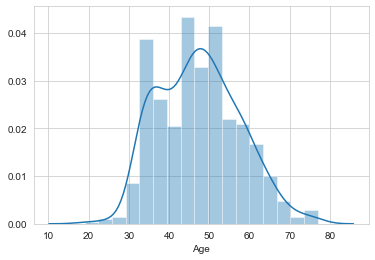

In [11]:
sns.distplot(df['Age'])

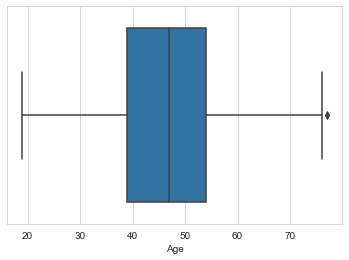

In [12]:
sns.boxplot(df['Age'])

In [13]:
df['Age'].mean()

47.40813008130081

In [14]:
df.columns

Index(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

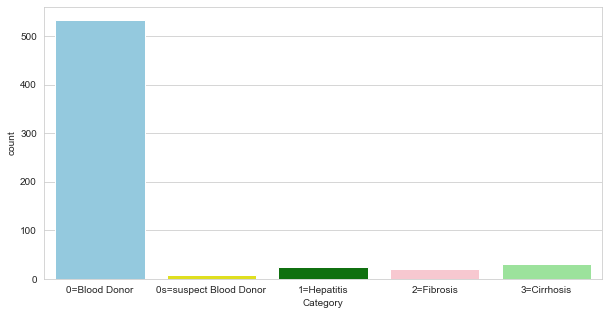

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(df['Category'],palette=['skyblue','yellow','green','pink','lightgreen'])

In [16]:
df['Sex'].value_counts()

m    377
f    238
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Gender')

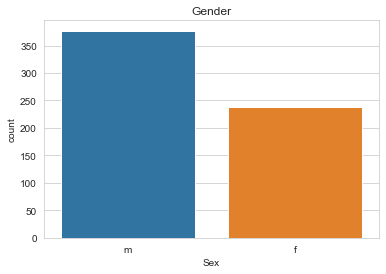

In [17]:
sns.countplot(df['Sex'])
plt.title('Gender')

In [18]:
#ALB	ALP	ALT	AST	BIL	CHE	CHOL	CREA	GGT	PROT

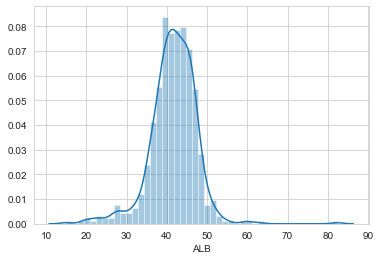

In [19]:
sns.distplot(df['ALB'])

In [20]:
df.isna().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [21]:
def impute_nan(df,var,mean):
    df[var+'mean']=df[var].fillna(mean)


In [22]:
mean=df['ALP'].mean()

In [23]:
impute_nan(df,'ALP',mean)

In [24]:
mean=df['CHOL'].mean()

In [25]:
impute_nan(df,'CHOL',mean)

In [26]:
mean=df['ALB'].mean()

In [27]:
impute_nan(df,'ALB',mean)

In [28]:
mean=df['PROT'].mean()

In [29]:
impute_nan(df,'PROT',mean)

In [30]:
mean=df['ALT'].mean()

In [31]:
impute_nan(df,'ALT',mean)

In [32]:
df.columns

Index(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT', 'ALPmean', 'CHOLmean', 'ALBmean',
       'PROTmean', 'ALTmean'],
      dtype='object')

In [33]:
df.isna().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
ALPmean      0
CHOLmean     0
ALBmean      0
PROTmean     0
ALTmean      0
dtype: int64

In [34]:
df.drop(columns=['ALB','PROT','ALP','CHOL','ALT'],inplace=True)

In [35]:
df.columns

Index(['Category', 'Age', 'Sex', 'AST', 'BIL', 'CHE', 'CREA', 'GGT', 'ALPmean',
       'CHOLmean', 'ALBmean', 'PROTmean', 'ALTmean'],
      dtype='object')

In [36]:
df.isna().sum()

Category    0
Age         0
Sex         0
AST         0
BIL         0
CHE         0
CREA        0
GGT         0
ALPmean     0
CHOLmean    0
ALBmean     0
PROTmean    0
ALTmean     0
dtype: int64

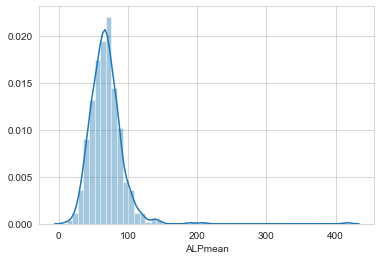

In [37]:
sns.distplot(df['ALPmean'])

In [38]:
skew(df['ALPmean'])

4.712695121316506

In [39]:
df['ALPmean']=np.log(df['ALPmean'])

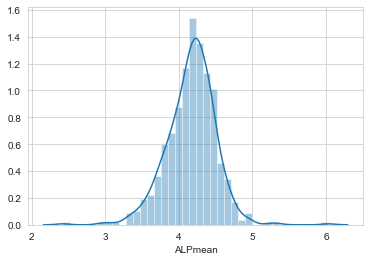

In [40]:
sns.distplot(df['ALPmean'])

In [41]:
skew(df['ALPmean'])

-0.2366114717078494

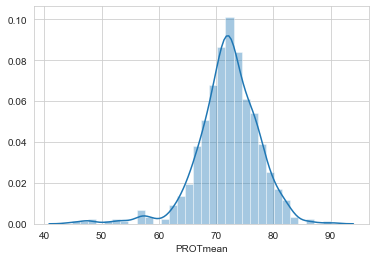

In [42]:
sns.distplot(df['PROTmean'])

In [43]:
df['AST'].skew()

4.940326985589485

In [44]:
df['AST']=np.log(df['AST'])

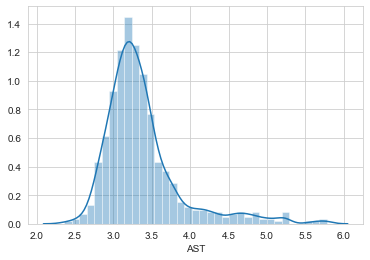

In [45]:
sns.distplot(df['AST'])

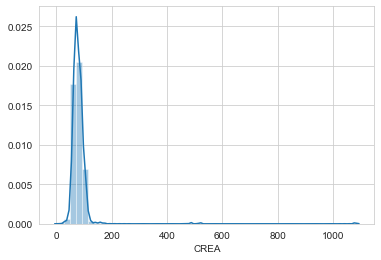

In [46]:
sns.distplot(df['CREA'])

In [47]:
df['CREA'].skew()

15.169291145044488

In [48]:
df['CREA']=np.log(df['CREA'])

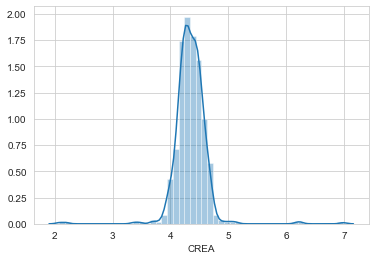

In [49]:
sns.distplot(df['CREA'])

In [50]:
df['CREA'].skew()

0.6500156460267272

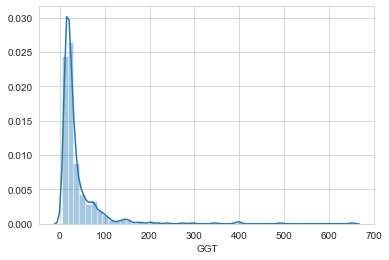

In [51]:
sns.distplot(df['GGT'])

In [52]:
df['GGT'].skew()

5.632734058440102

In [53]:
df['GGT']=np.log(df['GGT'])

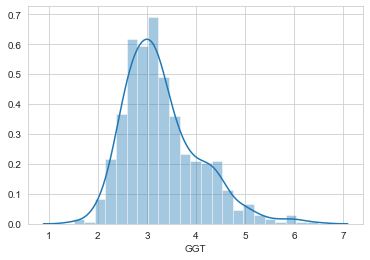

In [54]:
sns.distplot(df['GGT'])

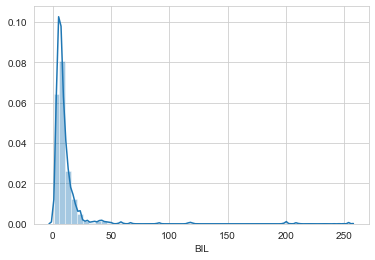

In [55]:
sns.distplot(df['BIL'])

In [56]:
print(skew(df['BIL']))

8.364970550890366


In [57]:
df['BIL']=np.log(df['BIL'])

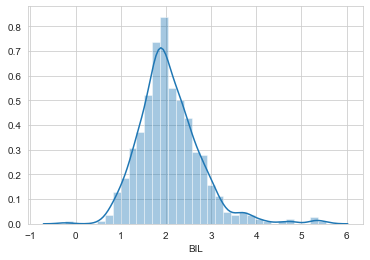

In [58]:
sns.distplot(df['BIL'])

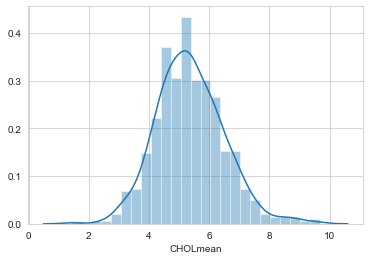

In [59]:
sns.distplot(df['CHOLmean'])

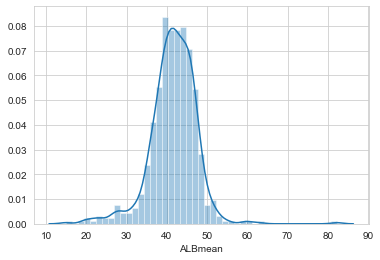

In [60]:
sns.distplot(df['ALBmean'])

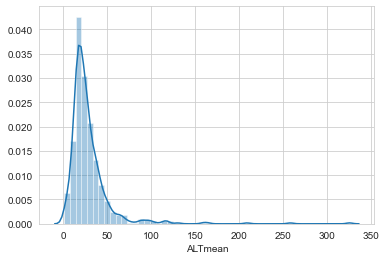

In [61]:
sns.distplot(df['ALTmean'])

In [62]:
df['ALTmean']=np.log(df['ALTmean'])

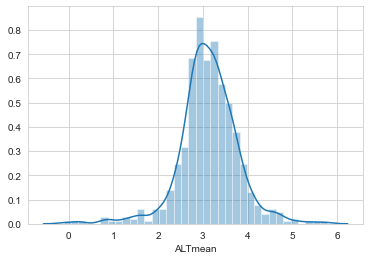

In [63]:
sns.distplot(df['ALTmean'])

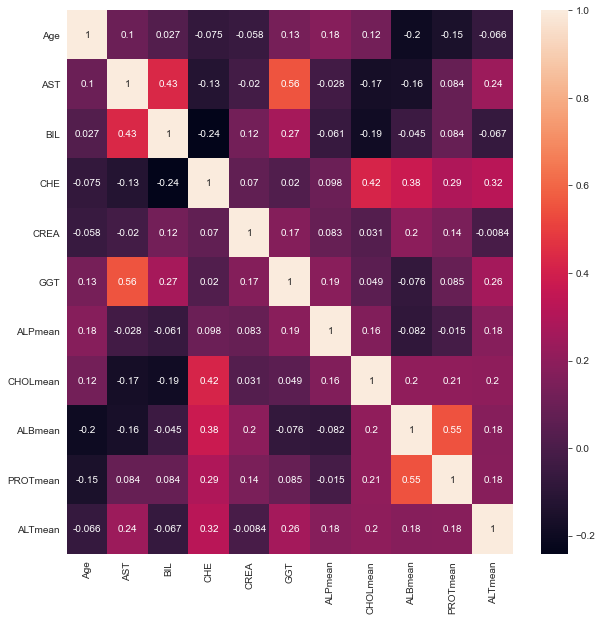

In [64]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [65]:
le=LabelEncoder()

In [66]:
df['Sex']=le.fit_transform(df['Sex'])

In [67]:
df

,Category,Age,Sex,AST,BIL,CHE,CREA,GGT,ALPmean,CHOLmean,ALBmean,PROTmean,ALTmean
0,0=Blood Donor,32,1,3.095578,2.014903,6.93,4.663439,2.493205,3.960813,3.23,38.5,69.0,2.041220
1,0=Blood Donor,32,1,3.206803,1.360977,11.17,4.304065,2.747271,4.252772,4.80,38.5,76.5,2.890372
2,0=Blood Donor,32,1,3.962716,1.808289,8.84,4.454347,3.502550,4.313480,5.20,46.9,79.3,3.589059
3,0=Blood Donor,32,1,3.117950,2.939162,7.33,4.382027,3.520461,3.951244,4.74,43.2,75.7,3.421000
4,0=Blood Donor,32,1,3.210844,2.261763,9.15,4.330733,3.397858,4.305416,4.32,39.2,68.7,3.484312
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,0,4.703204,3.912023,5.57,4.019980,6.478356,6.032127,6.30,32.0,68.5,1.774952
611,3=Cirrhosis,64,0,3.793239,2.995732,1.54,4.143135,3.580737,4.632785,3.02,24.0,71.3,1.064711
612,3=Cirrhosis,64,0,4.595120,3.871201,1.66,4.200205,4.162003,4.469350,3.63,29.0,82.0,1.252763
613,3=Cirrhosis,46,0,4.127134,2.995732,3.56,3.951244,3.912023,4.223674,4.20,33.0,71.0,3.663562


In [68]:
sc=StandardScaler()

In [69]:
df['Category']=le.fit_transform(df['Category'])

In [70]:
df['Category'].value_counts()

0    533
4     30
2     24
3     21
1      7
Name: Category, dtype: int64

In [71]:
X=df[['Age','Sex','AST','BIL','CHE','CREA','GGT','ALPmean','CHOLmean','ALBmean','PROTmean','ALTmean']]

In [72]:
X

,Age,Sex,AST,BIL,CHE,CREA,GGT,ALPmean,CHOLmean,ALBmean,PROTmean,ALTmean
0,32,1,3.095578,2.014903,6.93,4.663439,2.493205,3.960813,3.23,38.5,69.0,2.041220
1,32,1,3.206803,1.360977,11.17,4.304065,2.747271,4.252772,4.80,38.5,76.5,2.890372
2,32,1,3.962716,1.808289,8.84,4.454347,3.502550,4.313480,5.20,46.9,79.3,3.589059
3,32,1,3.117950,2.939162,7.33,4.382027,3.520461,3.951244,4.74,43.2,75.7,3.421000
4,32,1,3.210844,2.261763,9.15,4.330733,3.397858,4.305416,4.32,39.2,68.7,3.484312
...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,0,4.703204,3.912023,5.57,4.019980,6.478356,6.032127,6.30,32.0,68.5,1.774952
611,64,0,3.793239,2.995732,1.54,4.143135,3.580737,4.632785,3.02,24.0,71.3,1.064711
612,64,0,4.595120,3.871201,1.66,4.200205,4.162003,4.469350,3.63,29.0,82.0,1.252763
613,46,0,4.127134,2.995732,3.56,3.951244,3.912023,4.223674,4.20,33.0,71.0,3.663562


In [73]:
Y=df['Category']

In [74]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=25,random_state=34)

In [75]:
x_train=sc.fit_transform(x_train);

In [76]:
x_test=sc.transform(x_test);

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
lr=LogisticRegression(multi_class='ovr')

In [79]:
lr.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [80]:
ypred=lr.predict(x_test)

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
acc=accuracy_score(y_test,ypred)

In [83]:
acc

0.96

In [84]:
cm=confusion_matrix(y_test,ypred)

In [85]:
cm

array([[18,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0],
       [ 0,  0,  1,  0,  0],
       [ 1,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  2]], dtype=int64)

In [86]:
from sklearn.svm import SVC

In [87]:
svc=SVC()

In [88]:
svc.fit(x_train,y_train)

SVC()

In [89]:
ypred=svc.predict(x_test)

In [90]:
accuracy_score(y_test,ypred)

0.8

In [91]:
import pickle

In [92]:
file = open('hepat.pkl', 'wb')
pickle.dump(lr,file)
file.close()